In [2]:
apikey = 'sS28fU9aZ03yFSpx0QaOSW864llazUDUIr1ShpQroQ6PiVcHRAdFvCLkJB1XMFDX'
secret = 'FNmuJSKqW53yQrWaSxSTF5I1r298xhJQJkkCS38WR7CxeydkBe5N0hfaSu2UBGA8'

In [3]:
#!pip install python-binance pandas mplfinance
#!pip install pandas-datareader


In [4]:
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
import pandas as pd
import datetime as dt
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import numpy as np
import csv
from IPython.display import display
from textblob import TextBlob
%matplotlib inline

Binance API Data

In [5]:
client = Client(apikey, secret)

In [6]:
tickers =client.get_all_tickers()
tickers

[{'symbol': 'ETHBTC', 'price': '0.07426600'},
 {'symbol': 'LTCBTC', 'price': '0.00265300'},
 {'symbol': 'BNBBTC', 'price': '0.01014200'},
 {'symbol': 'NEOBTC', 'price': '0.00052400'},
 {'symbol': 'QTUMETH', 'price': '0.00218600'},
 {'symbol': 'EOSETH', 'price': '0.00081700'},
 {'symbol': 'SNTETH', 'price': '0.00002153'},
 {'symbol': 'BNTETH', 'price': '0.00074900'},
 {'symbol': 'BCCBTC', 'price': '0.07908100'},
 {'symbol': 'GASBTC', 'price': '0.00012380'},
 {'symbol': 'BNBETH', 'price': '0.13660000'},
 {'symbol': 'BTCUSDT', 'price': '39680.26000000'},
 {'symbol': 'ETHUSDT', 'price': '2946.98000000'},
 {'symbol': 'HSRBTC', 'price': '0.00041400'},
 {'symbol': 'OAXETH', 'price': '0.00017780'},
 {'symbol': 'DNTETH', 'price': '0.00002801'},
 {'symbol': 'MCOETH', 'price': '0.00577200'},
 {'symbol': 'ICNETH', 'price': '0.00166300'},
 {'symbol': 'MCOBTC', 'price': '0.00021140'},
 {'symbol': 'WTCBTC', 'price': '0.00001117'},
 {'symbol': 'WTCETH', 'price': '0.00023700'},
 {'symbol': 'LRCBTC', 'p

In [7]:
tickers[558]

{'symbol': 'DOGEUSDT', 'price': '0.13420000'}

In [8]:
ticker_df = pd.DataFrame(tickers)

In [9]:
ticker_df.set_index('symbol', inplace=True)

In [10]:
ticker_df.loc['DOGEUSDT']

price    0.13420000
Name: DOGEUSDT, dtype: object

In [11]:
historical = client.get_historical_klines('DOGEUSDT', client.KLINE_INTERVAL_1DAY, '1 jan 2016')

In [12]:
historical


[[1562284800000,
  '0.00449000',
  '0.00460000',
  '0.00355000',
  '0.00387010',
  '1928297660.00000000',
  1562371199999,
  '7506289.39817290',
  18589,
  '858403324.00000000',
  '3336426.01151920',
  '0'],
 [1562371200000,
  '0.00387410',
  '0.00394260',
  '0.00336520',
  '0.00350000',
  '1010744287.00000000',
  1562457599999,
  '3692804.08878380',
  17250,
  '522724122.00000000',
  '1908499.50964960',
  '0'],
 [1562457600000,
  '0.00350400',
  '0.00365000',
  '0.00340000',
  '0.00353770',
  '530613992.00000000',
  1562543999999,
  '1860353.07168390',
  9394,
  '275110757.00000000',
  '965093.40977300',
  '0'],
 [1562544000000,
  '0.00353780',
  '0.00356180',
  '0.00340000',
  '0.00345800',
  '308445688.00000000',
  1562630399999,
  '1078072.00566180',
  4958,
  '159456967.00000000',
  '558024.17586270',
  '0'],
 [1562630400000,
  '0.00346200',
  '0.00358200',
  '0.00335640',
  '0.00345450',
  '253375582.00000000',
  1562716799999,
  '878528.33377630',
  5690,
  '115809520.00000000',

In [13]:
hist_df = pd.DataFrame(historical)

In [14]:
hist_df.head()



,0,1,2,3,4,5,6,7,8,9,10,11
0,1562284800000,0.00449000,0.00460000,0.00355000,0.00387010,1928297660.00000000,1562371199999,7506289.39817290,18589,858403324.00000000,3336426.01151920,0
1,1562371200000,0.00387410,0.00394260,0.00336520,0.00350000,1010744287.00000000,1562457599999,3692804.08878380,17250,522724122.00000000,1908499.50964960,0
2,1562457600000,0.00350400,0.00365000,0.00340000,0.00353770,530613992.00000000,1562543999999,1860353.07168390,9394,275110757.00000000,965093.40977300,0
3,1562544000000,0.00353780,0.00356180,0.00340000,0.00345800,308445688.00000000,1562630399999,1078072.00566180,4958,159456967.00000000,558024.17586270,0
4,1562630400000,0.00346200,0.00358200,0.00335640,0.00345450,253375582.00000000,1562716799999,878528.33377630,5690,115809520.00000000,402047.29506700,0


In [15]:
hist_df.columns = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Time', 'Number of Trades', 'TB Base Volume', 'TB Quote Volume', 'Ignore'] 

In [16]:

hist_df.head()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Time,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,1562284800000,0.00449000,0.00460000,0.00355000,0.00387010,1928297660.00000000,1562371199999,7506289.39817290,18589,858403324.00000000,3336426.01151920,0
1,1562371200000,0.00387410,0.00394260,0.00336520,0.00350000,1010744287.00000000,1562457599999,3692804.08878380,17250,522724122.00000000,1908499.50964960,0
2,1562457600000,0.00350400,0.00365000,0.00340000,0.00353770,530613992.00000000,1562543999999,1860353.07168390,9394,275110757.00000000,965093.40977300,0
3,1562544000000,0.00353780,0.00356180,0.00340000,0.00345800,308445688.00000000,1562630399999,1078072.00566180,4958,159456967.00000000,558024.17586270,0
4,1562630400000,0.00346200,0.00358200,0.00335640,0.00345450,253375582.00000000,1562716799999,878528.33377630,5690,115809520.00000000,402047.29506700,0


In [17]:
hist_df['Open Time'] = pd.to_datetime(hist_df['Open Time']/1000, unit='s')
hist_df['Close Time'] = pd.to_datetime(hist_df['Close Time']/1000, unit='s')


In [18]:
hist_df.head()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Time,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,2019-07-05,0.00449000,0.00460000,0.00355000,0.00387010,1928297660.00000000,2019-07-05 23:59:59.999000064,7506289.39817290,18589,858403324.00000000,3336426.01151920,0
1,2019-07-06,0.00387410,0.00394260,0.00336520,0.00350000,1010744287.00000000,2019-07-06 23:59:59.999000064,3692804.08878380,17250,522724122.00000000,1908499.50964960,0
2,2019-07-07,0.00350400,0.00365000,0.00340000,0.00353770,530613992.00000000,2019-07-07 23:59:59.999000064,1860353.07168390,9394,275110757.00000000,965093.40977300,0
3,2019-07-08,0.00353780,0.00356180,0.00340000,0.00345800,308445688.00000000,2019-07-08 23:59:59.999000064,1078072.00566180,4958,159456967.00000000,558024.17586270,0
4,2019-07-09,0.00346200,0.00358200,0.00335640,0.00345450,253375582.00000000,2019-07-09 23:59:59.999000064,878528.33377630,5690,115809520.00000000,402047.29506700,0


In [19]:
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Quote Asset Time', 'TB Base Volume', 'TB Quote Volume']

In [20]:
hist_df[numeric_columns] = hist_df[numeric_columns].apply(pd.to_numeric, axis=1)


In [21]:
hist_df.tail()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Time,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
1020,2022-04-20,0.1425,0.1468,0.1389,0.1407,1.387122e+09,2022-04-20 23:59:59.999000064,1.987124e+08,183954,699615979.0,1.002682e+08,0
1021,2022-04-21,0.1407,0.1430,0.1340,0.1362,8.737203e+08,2022-04-21 23:59:59.999000064,1.219317e+08,134778,426350250.0,5.953034e+07,0
1022,2022-04-22,0.1362,0.1382,0.1346,0.1363,5.721757e+08,2022-04-22 23:59:59.999000064,7.805087e+07,82694,270388385.0,3.688771e+07,0
1023,2022-04-23,0.1363,0.1368,0.1331,0.1339,3.376911e+08,2022-04-23 23:59:59.999000064,4.556119e+07,56187,164426748.0,2.218329e+07,0
1024,2022-04-24,0.1338,0.1348,0.1333,0.1342,1.393283e+08,2022-04-24 23:59:59.999000064,1.869812e+07,19722,60764882.0,8.155859e+06,0


In [22]:
import mplfinance as mpf

In [23]:
hist_df.set_index('Close Time').tail(1460)

,Open Time,Open,High,Low,Close,Volume,Quote Asset Time,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
Close Time,,,,,,,,,,,
2019-07-05 23:59:59.999000064,2019-07-05,0.004490,0.004600,0.003550,0.003870,1.928298e+09,7.506289e+06,18589,858403324.0,3.336426e+06,0
2019-07-06 23:59:59.999000064,2019-07-06,0.003874,0.003943,0.003365,0.003500,1.010744e+09,3.692804e+06,17250,522724122.0,1.908500e+06,0
2019-07-07 23:59:59.999000064,2019-07-07,0.003504,0.003650,0.003400,0.003538,5.306140e+08,1.860353e+06,9394,275110757.0,9.650934e+05,0
2019-07-08 23:59:59.999000064,2019-07-08,0.003538,0.003562,0.003400,0.003458,3.084457e+08,1.078072e+06,4958,159456967.0,5.580242e+05,0
2019-07-09 23:59:59.999000064,2019-07-09,0.003462,0.003582,0.003356,0.003455,2.533756e+08,8.785283e+05,5690,115809520.0,4.020473e+05,0
...,...,...,...,...,...,...,...,...,...,...,...
2022-04-20 23:59:59.999000064,2022-04-20,0.142500,0.146800,0.138900,0.140700,1.387122e+09,1.987124e+08,183954,699615979.0,1.002682e+08,0
2022-04-21 23:59:59.999000064,2022-04-21,0.140700,0.143000,0.134000,0.136200,8.737203e+08,1.219317e+08,134778,426350250.0,5.953034e+07,0
2022-04-22 23:59:59.999000064,2022-04-22,0.136200,0.138200,0.134600,0.136300,5.721757e+08,7.805087e+07,82694,270388385.0,3.688771e+07,0


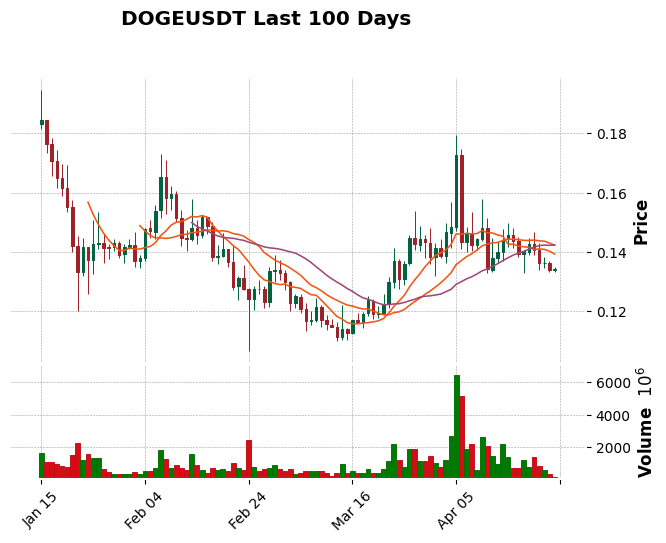

In [24]:
mpf.plot(hist_df.set_index('Open Time').tail(100), 
        type='candle', style='charles', 
        volume=True, 
        title='DOGEUSDT Last 100 Days', 
        mav=(10,20,30))

In [25]:
start = dt.datetime(2020,12,1)
end = dt.datetime(2021,11,1)


In [26]:
doge = web.DataReader('DOGE-USD', 'yahoo', start, end)

doge

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-01,0.003572,0.003269,0.003551,0.003335,80163603,0.003335
2020-12-02,0.003436,0.003293,0.003335,0.003374,58705661,0.003374
2020-12-03,0.003500,0.003352,0.003375,0.003428,47907032,0.003428
2020-12-04,0.003447,0.003285,0.003429,0.003298,45062222,0.003298
2020-12-05,0.003414,0.003268,0.003297,0.003397,43386583,0.003397
...,...,...,...,...,...,...
2021-10-29,0.306312,0.279771,0.299964,0.287853,5866664030,0.287853
2021-10-30,0.294647,0.259888,0.287764,0.268345,3637334331,0.268345
2021-10-31,0.284707,0.252614,0.269239,0.280244,4224104205,0.280244


In [27]:
start = dt.datetime(2021,5,13)
end = dt.datetime(2021,5,15)

In [28]:
doge = web.DataReader('DOGE-USD', 'yahoo', start, end)
doge

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-05-13,0.519461,0.357175,0.392176,0.490374,18663174069,0.490374
2021-05-14,0.589690,0.464622,0.487070,0.559604,20466177002,0.559604
2021-05-15,0.562676,0.491299,0.559668,0.507972,9836892944,0.507972
2021-05-16,0.548145,0.451023,0.507910,0.514895,9541552064,0.514895


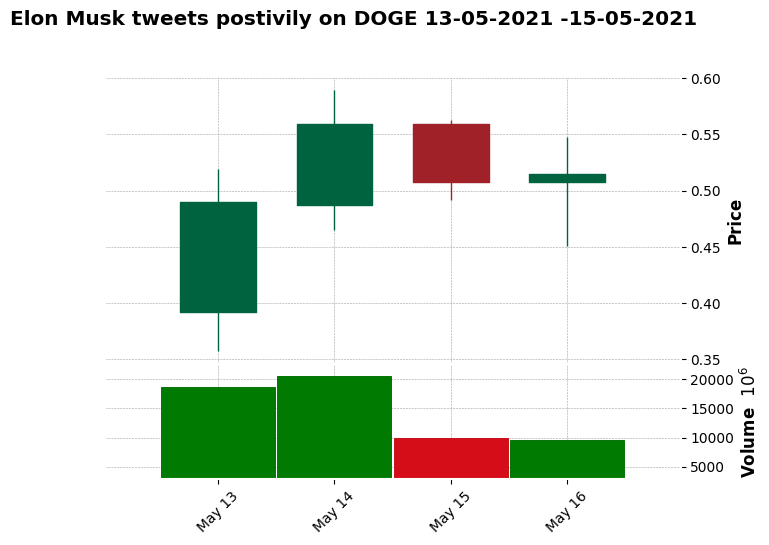

In [29]:
mpf.plot(doge, type = "candle" , volume=True, style="charles", title='Elon Musk tweets postivily on DOGE 13-05-2021 -15-05-2021  ')

In [30]:
start = dt.datetime(2021,5,9)
end = dt.datetime(2021,5,10)


In [31]:
doge = web.DataReader('DOGE-USD', 'yahoo', start, end)
doge

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-05-09,0.697625,0.425706,0.635820,0.570070,46138063928,0.570070
2021-05-10,0.569687,0.421291,0.569687,0.449964,16514521828,0.449964
2021-05-11,0.546651,0.445034,0.450488,0.495231,14566975476,0.495231


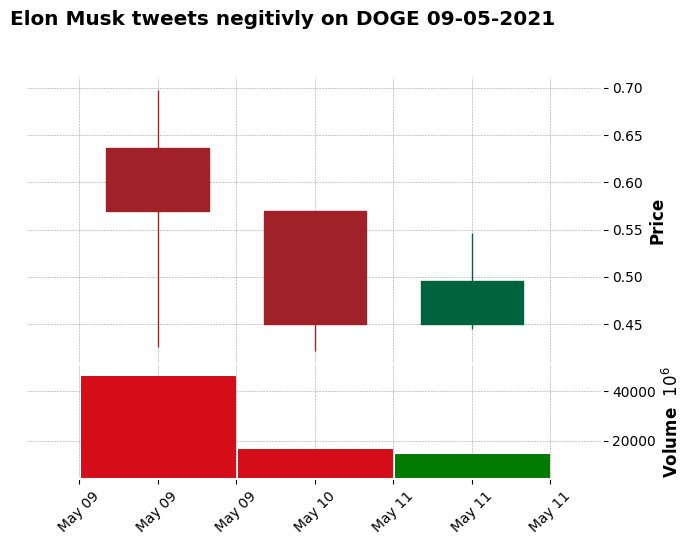

In [32]:
mpf.plot(doge, type = "candle" , volume=True, style="charles", title='Elon Musk tweets negitivly on DOGE 09-05-2021')

In [33]:
start = dt.datetime(2021,8,9)
end = dt.datetime(2021,9,9)

In [34]:
doge = web.DataReader('DOGE-USD', 'yahoo', start, end)
doge

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-08-09,0.266265,0.231410,0.240122,0.256897,4607903346,0.256897
2021-08-10,0.262791,0.245352,0.256366,0.257325,3424415504,0.257325
2021-08-11,0.282482,0.256382,0.257424,0.265263,4732068476,0.265263
2021-08-12,0.294142,0.252775,0.264853,0.263921,5264857508,0.263921
2021-08-13,0.287188,0.261907,0.264249,0.286808,3565092106,0.286808
2021-08-14,0.298456,0.277154,0.286801,0.293113,4677579997,0.293113
2021-08-15,0.348722,0.287063,0.294086,0.341441,8046171669,0.341441
2021-08-16,0.350953,0.310828,0.340165,0.320715,6681324187,0.320715
2021-08-17,0.339462,0.295763,0.319631,0.299442,5699700481,0.299442


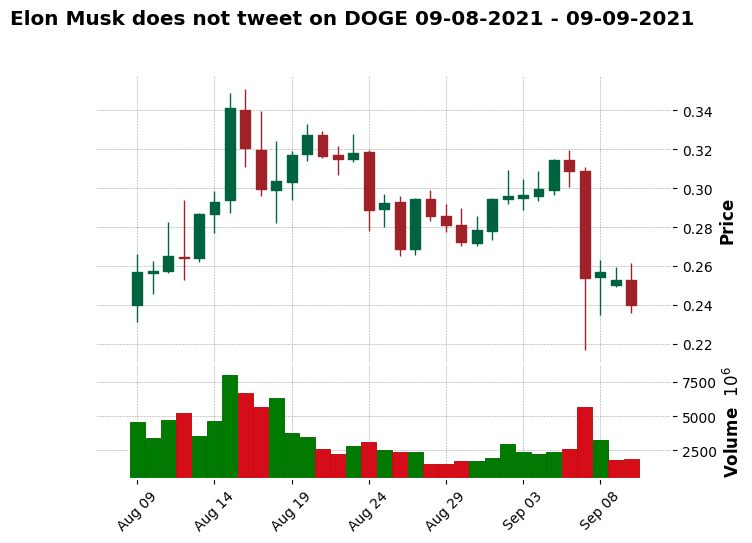

In [35]:
mpf.plot(doge, type = "candle" , volume=True, style="charles", title='Elon Musk does not tweet on DOGE 09-08-2021 - 09-09-2021')

In [36]:
df = pd.read_csv('Dogecoin Historical Data.csv', usecols=['Date', 'High'])
df['Date'] = pd.to_datetime(df['Date'])
df['Pct change'] = df['High'].pct_change().multiply(100)

tweets_df = pd.read_csv('53tweets.csv', usecols=['Date', 'Tweet', 'Time'])
tweets_df['Offset'] = tweets_df['Time'].apply(lambda time: '1 days' if time.find('pm') > -1 else 0)
tweets_df['Date'] = (pd.to_datetime(tweets_df['Date']) + pd.to_timedelta(tweets_df['Offset']))
data = pd.merge(df, tweets_df, on="Date")

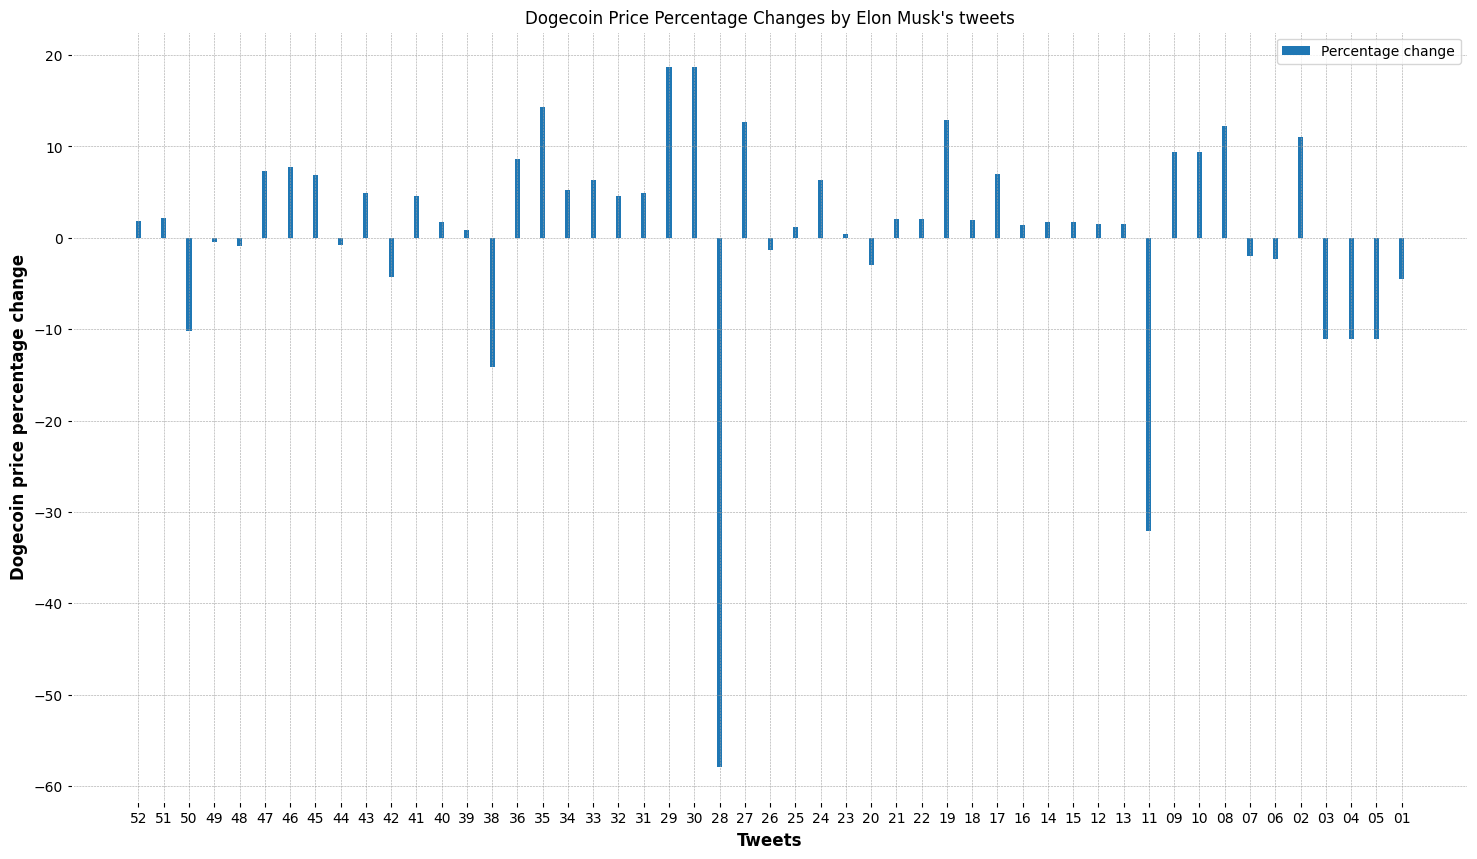

In [37]:
fig, ax = plt.subplots(figsize=(18,10))
width = 0.2
labels = list(map(lambda x: x.replace('tweet', ''), data['Tweet'].values.tolist()))
percentage_change = data['Pct change'].values.tolist()
ax.bar(labels, percentage_change, width, label='Percentage change')
ax.set_ylabel('Dogecoin price percentage change')
ax.set_xlabel('Tweets')
ax. set_title("Dogecoin Price Percentage Changes by Elon Musk's tweets")
ax.legend()
plt.show()

In [38]:
datafile ='53tweets.csv'

In [39]:
raw_data = pd.read_csv(datafile, parse_dates=[0], infer_datetime_format=True)

In [40]:
reindexed_data = raw_data['Tweet']
reindexed_data.index = raw_data['Text']

In [41]:
raw_data.head()


,Tweet,Date,Time,Text
0,tweet01,Dec-02-2017,7:33 pm,"{""Text"":""@highqualitysh1t I love the thought o..."
1,tweet02,Apr-04-2019,10:24 am,"{""Text"":""@Tom_Heats Dogecoin might be my fav c..."
2,tweet03,Apr-02-2019,8:40 pm,"{""Text"":""@dogecoin Uh oh"""
3,tweet04,Apr-02-2019,9:16 pm,"{""Text"":""Dogecoin rulz https://t.co/flWWUgAgLU"""
4,tweet05,Apr-02-2019,9:38 pm,"{""Text"":""Dogecoin value may vary https://t.co/..."


In [42]:
positive_sentence = "dogecoin, doge, dogecoin is for the people, dogecoin is good!"
neutral_sentence = "dogecoin looks okay"
negative_sentence = "dogecoin is bad"

In [43]:
positive_blob = TextBlob(positive_sentence)
neutral_blob = TextBlob(neutral_sentence)
negative_blob = TextBlob(negative_sentence)

In [44]:
print("Positive sentence: ", positive_blob.sentiment)
print("Neutral sentence: ", neutral_blob.sentiment)
print("Negative sentence: ", negative_blob.sentiment)

Positive sentence:  Sentiment(polarity=0.875, subjectivity=0.6000000000000001)
Neutral sentence:  Sentiment(polarity=0.5, subjectivity=0.5)
Negative sentence:  Sentiment(polarity=-0.6999999999999998, subjectivity=0.6666666666666666)


Stopwords


In [45]:
import io
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [46]:
# word_tokenize accepts

#stop_words = set(stopwords.words('english'))
#file1 = open('data-clensing.csv', encoding= "UTF-8")

In [47]:
#line = file1.read()
#words = line.split()
#for r in words:
    #if not r in stop_words:
       # appendFile = open('fstop.txt','a', encoding="utf-8")
        #appendFile.write(" "+r)
        #appendFile.close()



```
Frequency distabution in Tweets collected 

```



In [48]:
import nltk
from nltk.corpus import webtext
from nltk.probability import FreqDist

In [49]:
wt_words = open('fstop.txt', encoding= "UTF-8")
mydata = wt_words.read()
# add individual characters you want to get rid of
for c in "#0123456789£!$%^&*'()""';:-_/?><,.@":
    mydata = mydata.replace(c,"")

for w in ["RT", "date", "http"]:
    mydata = mydata.replace(w, "")


data_analysis = nltk.FreqDist(nltk.tokenize.word_tokenize(mydata))

In [50]:
# Let's take the specific words only if their frequency is greater than 10.
filter_words = dict([(m, n) for m, n in data_analysis.items() if n > 50])

In [51]:
filter_words["dogecoin"]


57159

In [52]:
for key in sorted(filter_words):
    print("%s: %s" % (key, filter_words[key]))

'': 401236
+: 3695
+Follow+Tag: 79
+Tag: 88
+…: 89
=: 3903
===========: 263
A: 3841
AAVE: 104
ABCD: 109
ABOUT: 164
ADA: 1643
ADABoy: 76
ADDRESS: 361
ADTX: 63
AGAIN: 70
AICLE: 112
AIRDROP: 182
AIRDROP🐈: 69
AIRPO: 496
AIが描くキャラクターNFTのMonacuteは月日にオークションを開始します！: 110
AKITA: 707
AKITAINU: 64
AKITAnetwork: 468
ALGO: 181
ALIEN: 75
ALIENARMY: 73
ALIENINU: 73
ALL: 342
ALLINMCDOGE: 78
ALPACA: 62
ALTSEASON: 1097
AM: 212
AMA: 995
AMC: 1395
AMCTheatres: 185
AND: 2259
ANKR: 69
ANNOUNCEMENT: 52
ANOTHER: 193
ANY: 494
ANYTHING: 95
AP: 109
APE: 91
APECOIN: 570
APY: 164
ARE: 321
AS: 79
ASS: 186
ASTROSHOTToken: 74
ASTROZERO: 386
ASTROZERONFT: 352
AT: 402
ATH: 465
ATH…: 58
ATLAS: 81
ATM: 86
ATMs: 253
ATOM: 70
ATTENTION: 75
AVAX: 968
AXS: 123
AbdulganiyuH: 54
Abhishe: 55
Ability: 62
About: 351
Absolutely: 429
Accept: 518
AcceptDoge: 139
Accepted: 347
Accepting: 106
Accepts: 323
Access: 72
According: 177
Account: 55
Accounts: 61
Accumulate: 51
Accumulated: 116
Accumulates: 199
Accumulating: 134
Accumulation: 1

In [53]:
data_analysis

FreqDist({"''": 401236, 'dogecoin': 57159, 'DogelonMars': 39688, 'BabyDogeCoin': 38513, 'Shiba': 34083, '為替': 33652, '米ドル→円': 33652, '香港ドル→円': 33652, '台湾ドル→円': 33652, '中国元→円': 33652, ...})

C:\Users\moham\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 28858 (\N{CJK UNIFIED IDEOGRAPH-70BA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\moham\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26367 (\N{CJK UNIFIED IDEOGRAPH-66FF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\moham\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 31859 (\N{CJK UNIFIED IDEOGRAPH-7C73}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\moham\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12489 (\N{KATAKANA LETTER DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\moham\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core

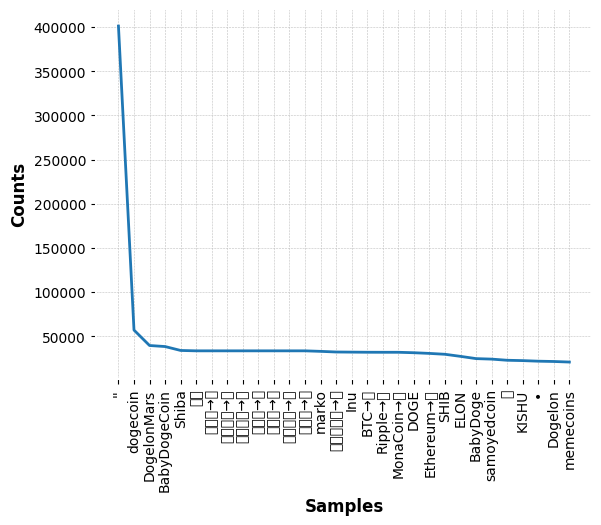

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [54]:
data_analysispost = nltk.FreqDist(filter_words)
 
data_analysispost.plot(30, cumulative=False)


Sentiment Analysis


In [55]:
import numpy as np
import pandas as pd

In [56]:
df = pd.read_csv('data-clensing.csv')

C:\Users\moham\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [57]:
df.shape

(324342, 4)

In [58]:
df.head()

,Date,TweetNo,User,Tweet
0,06/02/2022,1,Filimon1987,RT @hardbitspace: BitTorrent 10000.\nRetweet t...
1,06/02/2022,2,amir_shazrin,RT @ElonPunkYC: Floor went from 5 ETH to 8.6 E...
2,06/02/2022,3,umit587,RT @fzthsyn: Tercihini hangi kedilerden yana ...
3,06/02/2022,4,realwhalehacker,"""The FTX ad with Brady had some charm, it's cu..."
4,06/02/2022,5,hasanKylp33,RT @fzthsyn: Tercihini hangi kedilerden yana ...


In [59]:
import re 
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [60]:
corpus=[df]

for i in range(46256, 5):
  review = re.sub('[^a-zA-Z]', ' ', df['Tweet'][i])
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)


In [61]:
corpus

[              Date TweetNo             User  \
 0       06/02/2022       1      Filimon1987   
 1       06/02/2022       2     amir_shazrin   
 2       06/02/2022       3          umit587   
 3       06/02/2022       4  realwhalehacker   
 4       06/02/2022       5      hasanKylp33   
 ...            ...     ...              ...   
 324337  24/04/2022  324450       D9lNzenin6   
 324338  24/04/2022  324451   FHyseymanariin   
 324339  24/04/2022  324452        s3kcgrars   
 324340  24/04/2022  324453    9yqmavialatar   
 324341  24/04/2022  324454  wykuRjuZ6xHTWKD   
 
                                                     Tweet  
 0       RT @hardbitspace: BitTorrent 10000.\nRetweet t...  
 1       RT @ElonPunkYC: Floor went from 5 ETH to 8.6 E...  
 2       RT @fzthsyn: Tercihini hangi kedilerden yana  ...  
 3       "The FTX ad with Brady had some charm, it's cu...  
 4       RT @fzthsyn: Tercihini hangi kedilerden yana  ...  
 ...                                                   .

In [62]:
#@okex_brasil

In [63]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
#Sentiment Analysis
SA = SentimentIntensityAnalyzer()
df["Tweet"]= df["Tweet"].astype(str)
# Applying Model, Variable Creation
df['Polarity Score']=df["Tweet"].apply(lambda x:SA.polarity_scores(x)['compound'])
df['Neutral Score']=df["Tweet"].apply(lambda x:SA.polarity_scores(x)['neu'])
df['Negative Score']=df["Tweet"].apply(lambda x:SA.polarity_scores(x)['neg'])
df['Positive Score']=df["Tweet"].apply(lambda x:SA.polarity_scores(x)['pos'])


# Converting 0 to 1 Decimal Score to a Categorical Variable
df['Sentiment']=''
df.loc[df['Polarity Score']>0,'Sentiment']='Positive'
df.loc[df['Polarity Score']==0,'Sentiment']='Neutral'
df.loc[df['Polarity Score']<0,'Sentiment']='Negative'



df[:100]
#df.to_csv('Sentimental-data.csv')

,Date,TweetNo,User,Tweet,Polarity Score,Neutral Score,Negative Score,Positive Score,Sentiment
0,06/02/2022,1,Filimon1987,RT @hardbitspace: BitTorrent 10000.\nRetweet t...,0.0000,1.000,0.000,0.000,Neutral
1,06/02/2022,2,amir_shazrin,RT @ElonPunkYC: Floor went from 5 ETH to 8.6 E...,0.0000,1.000,0.000,0.000,Neutral
2,06/02/2022,3,umit587,RT @fzthsyn: Tercihini hangi kedilerden yana ...,0.0000,1.000,0.000,0.000,Neutral
3,06/02/2022,4,realwhalehacker,"""The FTX ad with Brady had some charm, it's cu...",0.6908,0.769,0.000,0.231,Positive
4,06/02/2022,5,hasanKylp33,RT @fzthsyn: Tercihini hangi kedilerden yana ...,0.0000,1.000,0.000,0.000,Neutral
...,...,...,...,...,...,...,...,...,...
95,06/02/2022,96,E__dollar,RT @shegzynanah: @W3stSideCryp @marvininu @Mar...,0.6597,0.645,0.089,0.266,Positive
96,06/02/2022,97,HamidJahanfakhr,RT @MemesCoinLover: What is the top #Token com...,0.2023,0.899,0.000,0.101,Positive
97,06/02/2022,98,itnyeinchanko,RT @ElonPunkYC: Floor went from 5 ETH to 8.6 E...,0.0000,1.000,0.000,0.000,Neutral
98,06/02/2022,99,rodamus444,RT @ElonPunkYC: Floor went from 5 ETH to 8.6 E...,0.0000,1.000,0.000,0.000,Neutral


In [64]:
df.loc[df['Polarity Score']>0,'Sentiment']
df['Date']= pd.to_datetime(df['Date'])
dfagg=df.groupby(by='Date').agg('mean')
dfagg[dfagg['Polarity Score']<0]
#dfagg2=dfagg.iloc[:,[1]]
#dfagg2.to_csv('dfagg2.csv')

dfagg

,Polarity Score,Neutral Score,Negative Score,Positive Score
Date,,,,
2022-01-03,0.095867,0.952125,0.006208,0.041667
2022-01-04,0.071015,0.953120,0.010264,0.036614
2022-02-03,0.146020,0.923138,0.011836,0.065003
2022-02-04,0.096342,0.951883,0.007095,0.041023
2022-02-13,0.113200,0.951089,0.006327,0.042584
...,...,...,...,...
2022-11-03,0.161847,0.924028,0.007231,0.068743
2022-11-04,0.116294,0.939486,0.008157,0.052354
2022-12-02,0.130821,0.941084,0.004304,0.054614


In [65]:
dfagg.index = pd.to_datetime(dfagg.index, format = '%Y/%m/%d')
dfagg.index = dfagg.index.strftime('%d-%m-%Y')

In [66]:
dfagg2=dfagg.iloc[:,[0]]
#dfagg2.to_csv('dfagg2.csv')
print (dfagg2.to_string())

            Polarity Score
Date                      
03-01-2022        0.095867
04-01-2022        0.071015
03-02-2022        0.146020
04-02-2022        0.096342
13-02-2022        0.113200
14-02-2022        0.367391
15-02-2022        0.150535
16-02-2022        0.010105
17-02-2022        0.232539
18-02-2022        0.245144
19-02-2022        0.000168
20-02-2022        0.219473
21-02-2022        0.135519
22-02-2022        0.112503
23-02-2022        0.153502
24-02-2022        0.109284
25-02-2022        0.107181
26-02-2022        0.141459
27-02-2022        0.199485
28-02-2022        0.131502
03-03-2022        0.138143
04-03-2022        0.085107
13-03-2022        0.111060
14-03-2022        0.075841
15-03-2022        0.100922
16-03-2022        0.076036
17-03-2022        0.133072
18-03-2022        0.089275
19-03-2022        0.223525
20-03-2022        0.110555
21-03-2022        0.115944
22-03-2022        0.000000
23-03-2022        0.140484
24-03-2022        0.117736
25-03-2022        0.161422
2

In [67]:
#dfagg2.to_csv('plo.csv')

Mering the data from the web scraper and the polarity scores from the daily sentiment


In [68]:
#mergedf = pd.merge(doge, dfagg, on='Date', how='inner')

In [88]:
SHIB = web.DataReader('ELON-USD', 'yahoo')
SHIB

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-04-23,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,523817,0.000000e+00
2021-04-24,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,51157783,0.000000e+00
2021-04-25,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,14962631,0.000000e+00
2021-04-26,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,30621745,0.000000e+00
2021-04-27,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,37492592,0.000000e+00
...,...,...,...,...,...,...
2022-04-20,1.000000e-06,1.000000e-06,1.000000e-06,1.000000e-06,224367601,1.000000e-06
2022-04-21,1.000000e-06,1.000000e-06,1.000000e-06,1.000000e-06,71395669,1.000000e-06
2022-04-22,1.000000e-06,1.000000e-06,1.000000e-06,1.000000e-06,45563738,1.000000e-06


In [89]:
SHIB.index = pd.to_datetime(SHIB.index, format = '%Y/%m/%d')
SHIB.index = SHIB.index.strftime('%d-%m-%Y')

In [90]:
mergeds = pd.concat([SHIB, dfagg2], axis=1, sort=True, join='inner')

In [72]:
#mergeds

In [73]:
mergeds.shape

(55, 7)

In [91]:
mergeds.to_csv('lstmelon.csv')

plotting all the coins respective of the days the data gathered

In [75]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import yfinance as yf
%matplotlib inline

In [76]:
start = "2022-1-06"
end = '2022-4-19'
doge = yf.download('DOGE-USD',start,end)
mona = yf.download('MONA-USD',start,end)
shib = yf.download('SHIB-USD',start,end)
soma = yf.download('SAMO-USD',start,end)
elon = yf.download('ELON-USD',start,end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Exploratory Analysis

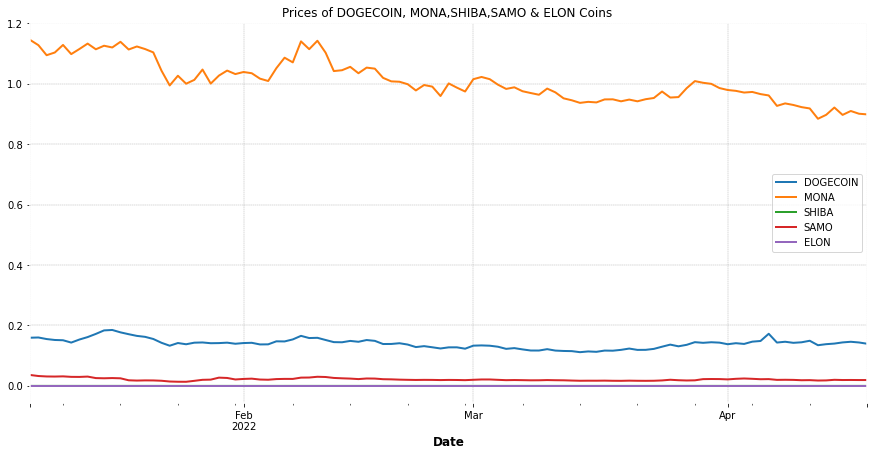

In [77]:
doge['Open'].plot(label = 'DOGECOIN', figsize = (15,7))
mona['Open'].plot(label = 'MONA')
shib['Open'].plot(label = 'SHIBA')
soma['Open'].plot(label = 'SAMO')
elon['Open'].plot(label = 'ELON')
plt.title('Prices of DOGECOIN, MONA,SHIBA,SAMO & ELON Coins ')
plt.legend()

Volume Traded

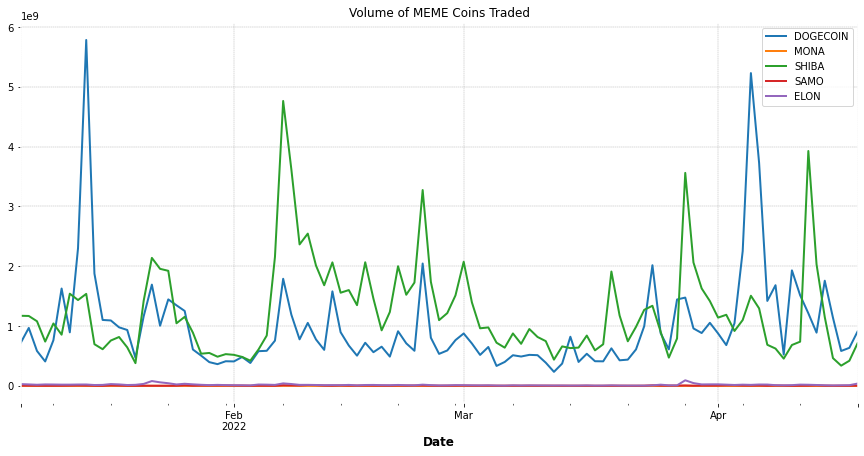

In [78]:
doge['Volume'].plot(label = 'DOGECOIN', figsize = (15,7))
mona['Volume'].plot(label = "MONA")
shib['Volume'].plot(label = 'SHIBA')
soma['Volume'].plot(label = "SAMO")
elon['Volume'].plot(label = 'ELON')
plt.title('Volume of MEME Coins Traded')
plt.legend()

Market Capitalisation

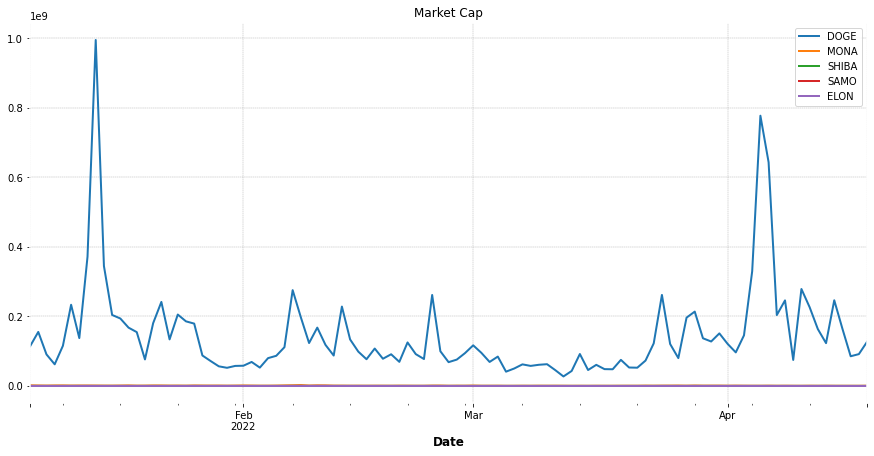

In [79]:
doge['MarktCap'] = doge['Open'] * doge['Volume']
mona['MarktCap'] = mona['Open'] * mona['Volume']
shib['MarktCap'] = shib['Open'] * shib['Volume']
soma['MarktCap'] = soma['Open'] * soma['Volume']
elon['MarktCap'] = elon['Open'] * elon['Volume']
doge['MarktCap'].plot(label = 'DOGE', figsize = (15,7))
mona['MarktCap'].plot(label = 'MONA')
shib['MarktCap'].plot(label = 'SHIBA')
soma['MarktCap'].plot(label = 'SAMO')
elon['MarktCap'].plot(label = 'ELON')
plt.title('Market Cap')
plt.legend()

Moving Average DOGECOIN

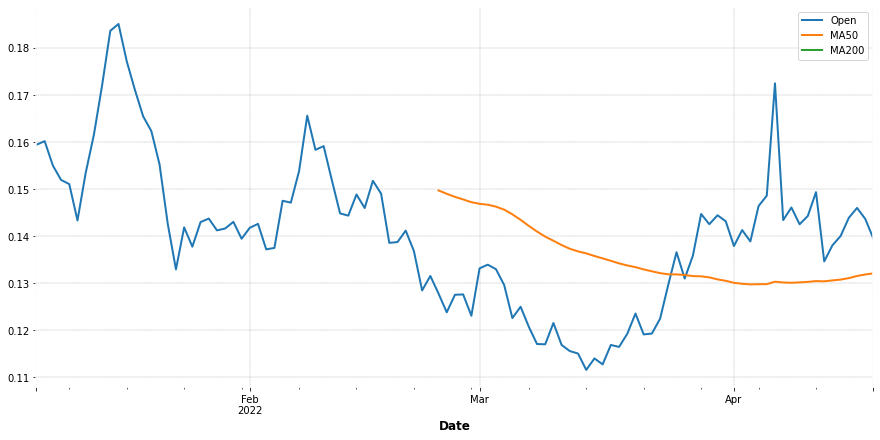

In [80]:
doge['MA50'] = doge['Open'].rolling(50).mean()
doge['MA200'] = doge['Open'].rolling(200).mean()
doge['Open'].plot(figsize = (15,7))
doge['MA50'].plot()
doge['MA200'].plot()
plt.legend()

Percentage increase in Coins value

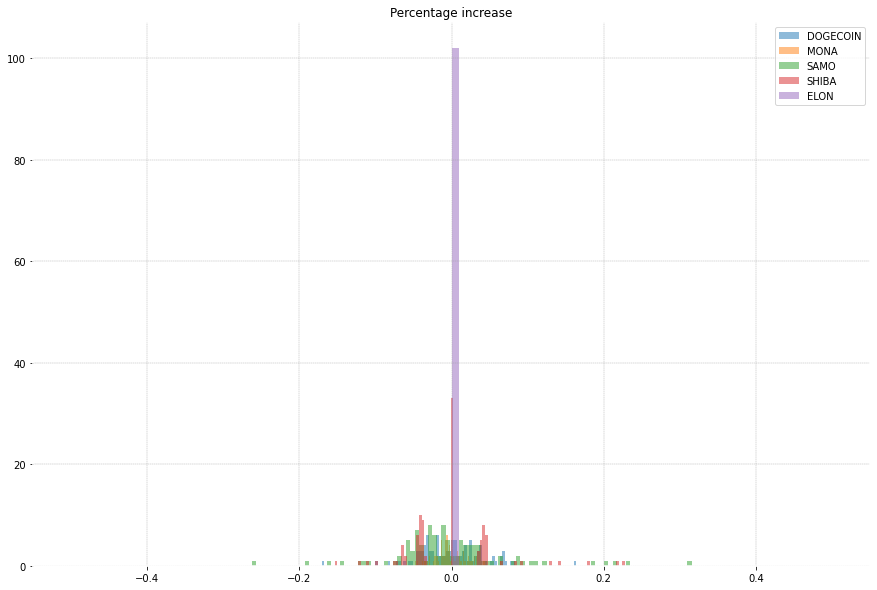

In [81]:
doge['returns'] = (doge['Close']/doge['Close'].shift(1)) -1
mona['returns'] = (mona['Close']/mona['Close'].shift(1))-1
soma['returns'] = (soma['Close']/soma['Close'].shift(1)) - 1
shib['returns'] = (shib['Close']/shib['Close'].shift(1))-1
elon['returns'] = (elon['Close']/elon['Close'].shift(1)) - 1
doge['returns'].hist(bins = 100, label = 'DOGECOIN', alpha = 0.5, figsize = (15,10))
mona['returns'].hist(bins = 100, label = 'MONA', alpha = 0.5)
soma['returns'].hist(bins = 100, label = 'SAMO', alpha = 0.5)
shib['returns'].hist(bins = 100, label = 'SHIBA', alpha = 0.5)
elon['returns'].hist(bins = 100, label = 'ELON', alpha = 0.5)
plt.title('Percentage increase')
plt.legend()

LSTM testing 

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import pandas_datareader.data as web

In [83]:
Doge = web.DataReader('DOGE-USD','yahoo',start ='2019-01-01',end = '2022-04-19')

In [84]:
Doge.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-04-16,0.147811,0.142093,0.146017,0.143712,584019179,0.143712
2022-04-17,0.144709,0.138995,0.143693,0.139459,636442285,0.139459
2022-04-18,0.140461,0.134384,0.139471,0.140286,909718484,0.140286
2022-04-19,0.144141,0.139500,0.140297,0.142665,679511647,0.142665
2022-04-20,0.146241,0.139595,0.142677,0.140878,1068542289,0.140878


In [85]:
Doge.shape

(1206, 6)

In [86]:
#data = Doge.to_csv('LSTMdoge.csv')


In [87]:
data = pd.read_csv('LSTMdoge.csv',date_parser = True)


FileNotFoundError: [Errno 2] No such file or directory: 'LSTMdoge.csv'

In [ ]:
data.tail()

,Date,High,Low,Open,Close,Volume,Adj Close,Polarity Score
50,28-02-2022,0.134479,0.121954,0.123118,0.133156,765755924,0.133156,0.131502
51,28-03-2022,0.152737,0.142457,0.144725,0.142657,1476875507,0.142657,0.153586
52,29-03-2022,0.148559,0.141290,0.142557,0.144470,961074557,0.144470,0.114973
53,30-03-2022,0.144997,0.139880,0.144456,0.143210,884305263,0.143210,0.107061
54,31-03-2022,0.147220,0.137172,0.143184,0.137826,1055136949,0.137826,0.083907


In [ ]:
data.shape


(55, 8)

In [ ]:
data_training = data[data['Date']<'2022-01-01'].copy()
data_test = data[data['Date']>='2022-01-01'].copy()

In [ ]:
data_training = data_training.drop(['Date', 'Adj Close'], axis = 1)

In [ ]:
scaler = MinMaxScaler()
data_training = scaler.fit_transform(data_training)
data_training

array([[1.        , 1.        , 1.        , 1.        , 0.07045993,
        0.26060259],
       [0.40758901, 0.43203955, 0.4077454 , 0.44345075, 0.00535956,
        0.39717668],
       [0.32289479, 0.29736914, 0.34062648, 0.30783182, 0.07699849,
        0.3757242 ],
       [0.57058135, 0.45848746, 0.43465666, 0.5958447 , 0.35847901,
        0.39825741],
       [0.96566047, 0.9975166 , 0.93224397, 0.9780269 , 0.08962003,
        0.19292723],
       [0.55453276, 0.46130078, 0.41268161, 0.61379973, 0.11026709,
        0.26189612],
       [0.25988081, 0.18855614, 0.28701087, 0.18780778, 0.14745945,
        0.23130051],
       [0.682787  , 0.54392646, 0.55424441, 0.63240427, 1.        ,
        0.2468901 ],
       [0.71671113, 0.57905707, 0.52185546, 0.63850896, 0.6423321 ,
        0.30780183],
       [0.03352556, 0.        , 0.0553034 , 0.        , 0.        ,
        0.30197343],
       [0.47173259, 0.45812285, 0.42139205, 0.48686746, 0.2751472 ,
        0.32610224],
       [0.59673047, 0

In [ ]:
X_train = []
y_train = []

for i in range(1000, data_training.shape[0]):
    X_train.append(data_training[i-60:i])
    y_train.append(data_training[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
data_training.shape

(32, 6)

In [ ]:
X_train.shape

(0,)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [ ]:
regressor = Sequential()

regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 120, activation = 'relu'))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

IndexError: tuple index out of range

In [ ]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 60)            15840     
                                                                 
 dropout (Dropout)           (None, 60, 60)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 60)            29040     
                                                                 
 dropout_1 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 80)            45120     
                                                                 
 dropout_2 (Dropout)         (None, 60, 80)            0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [ ]:
regressor.compile(optimizer='adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs=1, batch_size=32)

3/3 [==============================] - 3s 126ms/step - loss: 0.0895


In [ ]:
data_test.head()

,Date,High,Low,Open,Close,Volume,Adj Close
1096,2022-01-01,0.173423,0.170353,0.170510,0.173035,371336089,0.173035
1097,2022-01-02,0.175989,0.171201,0.173027,0.174403,391041933,0.174403
1098,2022-01-03,0.174406,0.168271,0.174406,0.170088,505900382,0.170088
1099,2022-01-04,0.172339,0.168128,0.170151,0.168803,541922892,0.168803
1100,2022-01-05,0.170747,0.151898,0.168835,0.159420,994086848,0.159420


In [ ]:
past_60_days = data_test.tail(60)

In [ ]:
df = past_60_days.append(data_test, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,0.145906,0.138751,0.138764,0.141206,655782652
1,0.141197,0.135852,0.141197,0.136868,490138547
2,0.141345,0.128246,0.136838,0.128490,913773124
3,0.131696,0.125365,0.128488,0.131553,711967119
4,0.135337,0.127846,0.131561,0.127846,587472906


In [ ]:
inputs = scaler.transform(df)
inputs

array([[0.19606362, 0.22655996, 0.1999589 , 0.20442157, 0.00927925],
       [0.18966512, 0.22178338, 0.2035042 , 0.19807241, 0.00689241],
       [0.18986622, 0.20925128, 0.1971524 , 0.18581025, 0.01299676],
       [0.17675537, 0.20450438, 0.18498502, 0.19029329, 0.01008884],
       [0.18170268, 0.20859222, 0.18946289, 0.18486769, 0.00829495],
       [0.17153086, 0.17845485, 0.18401308, 0.17896493, 0.02931841],
       [0.17197926, 0.19728432, 0.17821645, 0.1844725 , 0.01143171],
       [0.17454735, 0.20587853, 0.18364442, 0.18457642, 0.00754714],
       [0.17205263, 0.19904732, 0.18374787, 0.17793747, 0.00837184],
       [0.18053685, 0.1988842 , 0.17716   , 0.19263948, 0.01086391],
       [0.18495424, 0.21290251, 0.19181332, 0.19378402, 0.01246118],
       [0.18289434, 0.21417119, 0.19296449, 0.19239652, 0.01005381],
       [0.17940907, 0.20853291, 0.19155686, 0.1874495 , 0.00729667],
       [0.17425522, 0.19820867, 0.18665056, 0.17717638, 0.00920552],
       [0.16816653, 0.1982548 , 0.

In [ ]:
X_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])

X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((109, 60, 5), (109,))

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
scaler.scale_

array([1.35877872e+00, 1.64766088e+00, 1.45717154e+00, 1.46361450e+00,
       1.44094570e-11])

In [ ]:
scale = 1/8.18605127e-04
scale

1221.5901990069017

In [ ]:
y_pred = y_pred*scale
y_test = y_test*scale

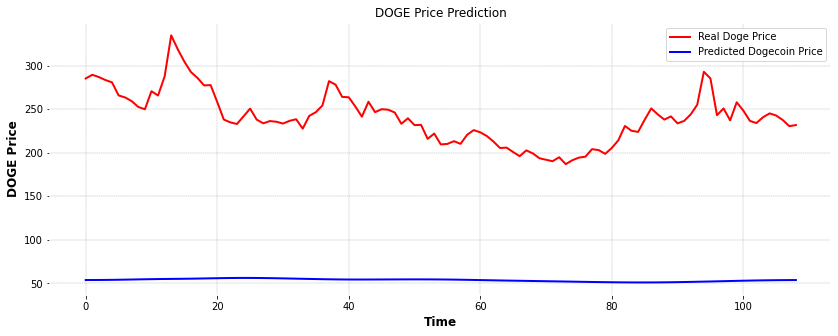

In [ ]:
# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real Doge Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Dogecoin Price')
plt.title('DOGE Price Prediction')
plt.xlabel('Time')
plt.ylabel('DOGE Price')
plt.legend()
plt.show()